<a href="https://colab.research.google.com/github/Andrey-Miroshnikov/dap-2024/blob/main/les05/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5
## Визуализация данных

**Выполнил:** Мирошников Андрей Евгеньевич  
**Группа:** 12002308

### Цель работы
Освоить основные методы и techniques визуализации данных с использованием библиотек Matplotlib и Seaborn в Python.

### Ход работы


Установка пакета **matplotlib**

In [15]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


Задача №1. Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
* Первый график должен быть красного цвета и нарисован штрихпунктирной линией
* Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией

/tmp/ipython-input-3869914918.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x1, 2/x1 + 3, color = 'red', linestyle = 'dashdot', label='x1')
/tmp/ipython-input-3869914918.py:11: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x2, 2/x2 + 3, color = (1.0, 0.2, 0.3), linestyle = 'solid', label='x2')


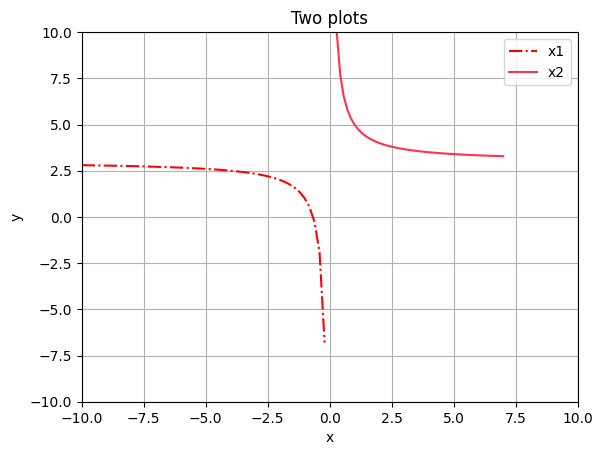

In [22]:
fig = plt.figure()
ax = plt.axes()
ax.set_title('Two plots')
ax.set_xlabel("x")
ax.set_ylabel("y");
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
x1 = np.linspace(-10, 0)
x2 = np.linspace(0, 7)
ax.plot(x1, 2/x1 + 3, color = 'red', linestyle = 'dashdot', label='x1')
ax.plot(x2, 2/x2 + 3, color = (1.0, 0.2, 0.3), linestyle = 'solid', label='x2')
ax.legend()
ax.grid()

Задача №2. Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* По оси X - возврат пассажира (Age)
* По оси Y - стоимость билета (Fare)
* Для выживших пассажиров используется маркер зеленый круг (Survived)
* Для не выживших пассажиров используется маркер красный крест (Survived)
* График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

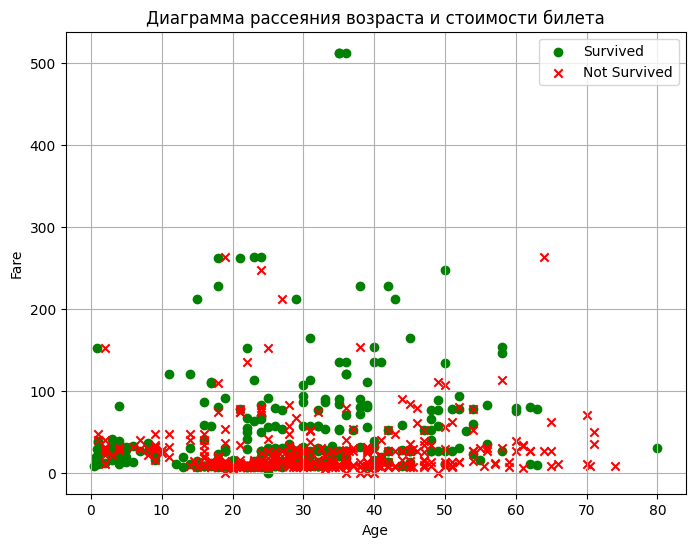

In [11]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Andrey-Miroshnikov/dap-2024/main/les05/data/titanic.csv'
df = pd.read_csv(url)
df_clean = df.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(8, 6))
survived = df_clean[df_clean['Survived'] == 1]
not_survived = df_clean[df_clean['Survived'] == 0]
plt.scatter(survived['Age'], survived['Fare'], c='green', label='Survived', marker='o')
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Not Survived', marker='x')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Диаграмма рассеяния возраста и стоимости билета')
plt.legend()
plt.grid(True)
plt.show()

Задача №3. Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

* Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
* Цвет маркеров должен зависеть от вида ирисов (iris.target)
* Графики должны иметь подписи к осям, легенду и общий заголовок

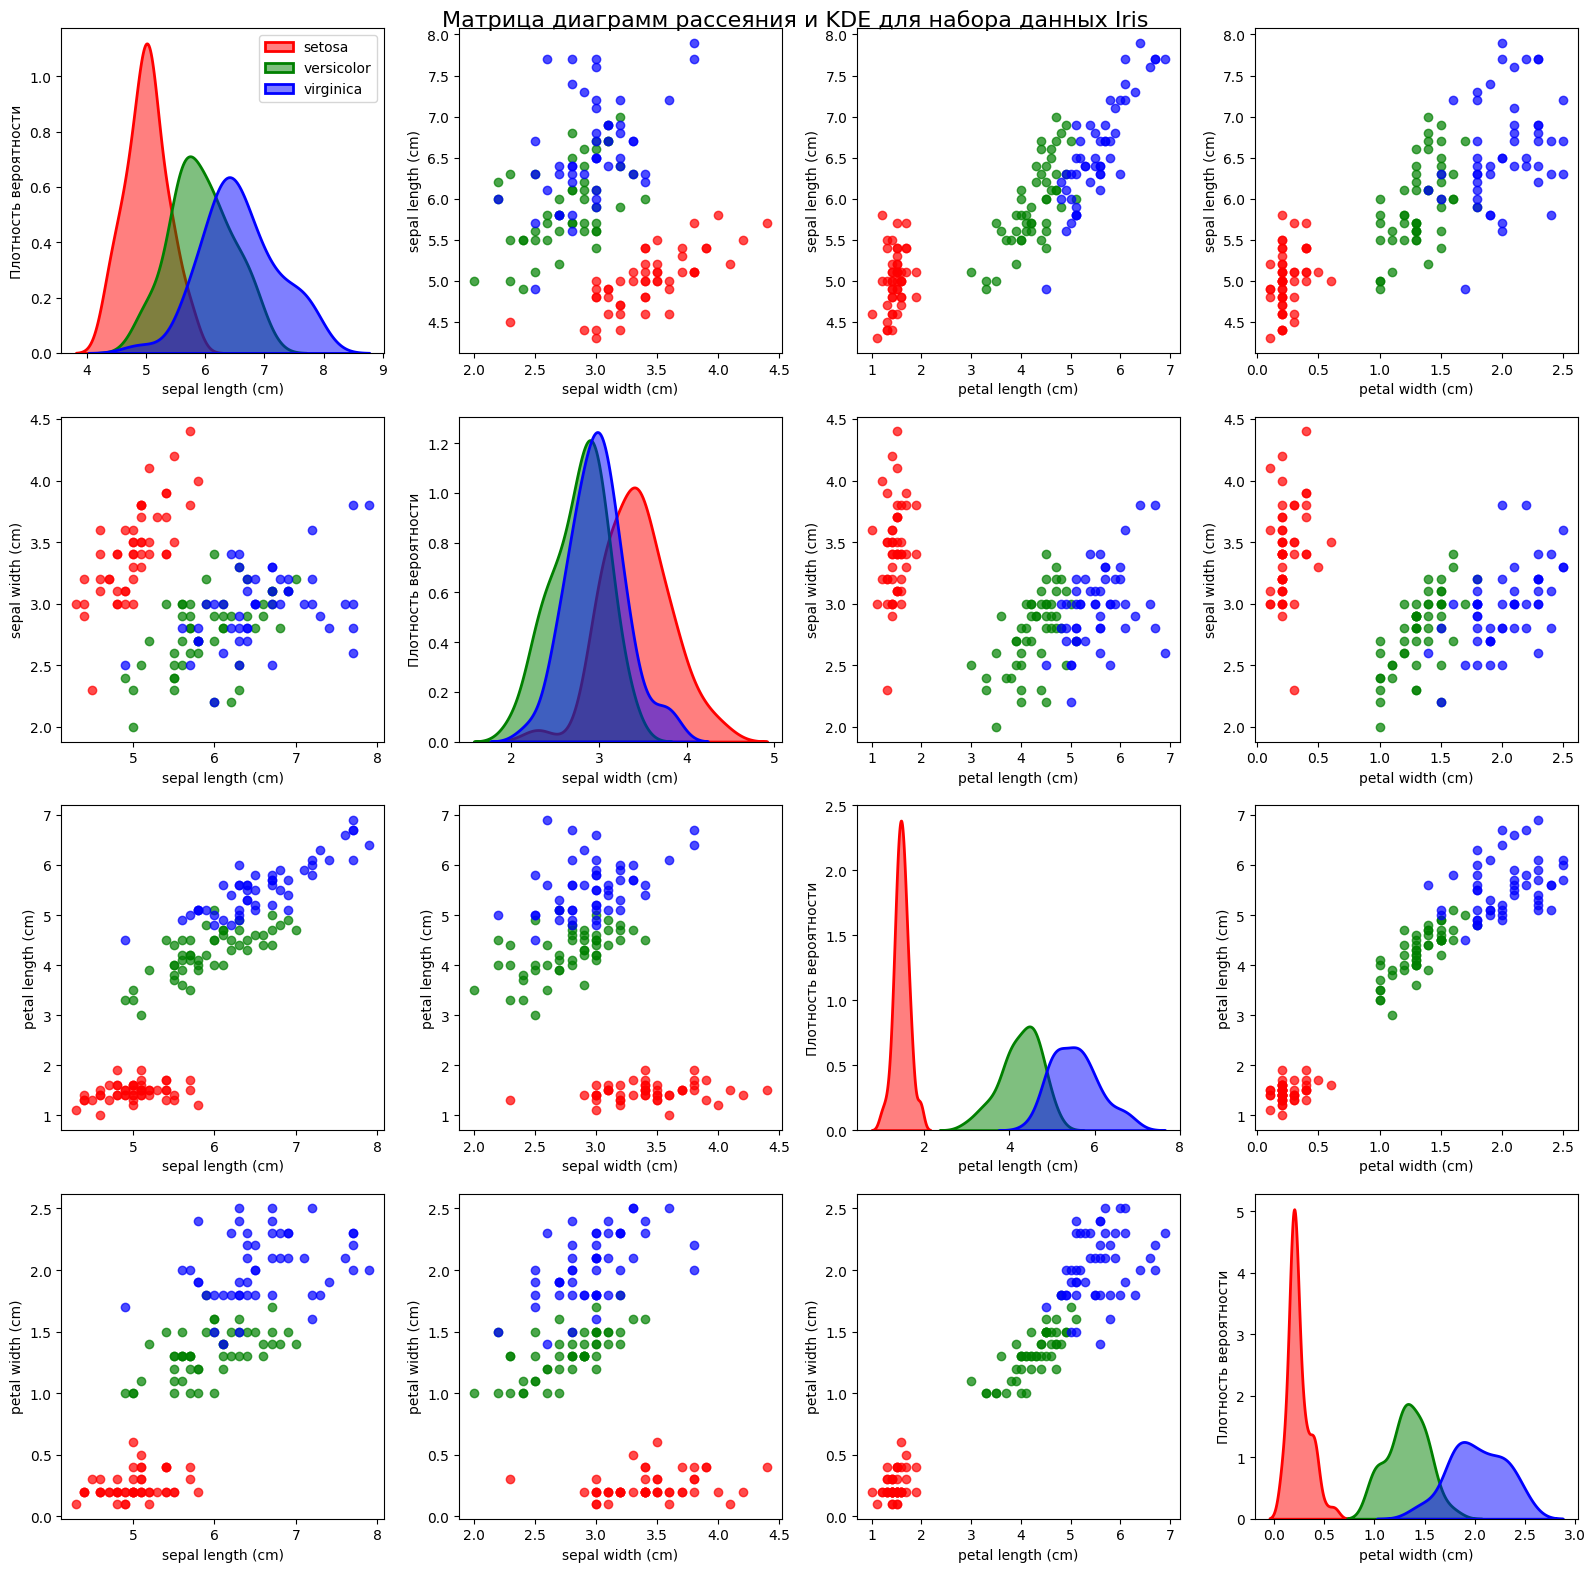

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Создание матрицы графиков
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Матрица диаграмм рассеяния и KDE для набора данных Iris', fontsize=16)

colors = ['red', 'green', 'blue']

for i in range(4):
    for j in range(4):
        if i == j:
            # Диагональ - KDE
            for target in range(3):
                sns.kdeplot(X[y == target, i], ax=axes[i, j],
                           color=colors[target], label=target_names[target],
                           fill=True, alpha=0.5, linewidth=2)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel('Плотность вероятности')
        else:
            # Диаграмма рассеяния
            for target in range(3):
                axes[i, j].scatter(X[y == target, j], X[y == target, i],
                                  c=colors[target], alpha=0.7, label=target_names[target])
            axes[i, j].set_xlabel(feature_names[j])
            axes[i, j].set_ylabel(feature_names[i])
        if i == 0 and j == 0:
            axes[i, j].legend()

plt.tight_layout()
plt.show()

Задача №4. Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.
* Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
* График должен иметь подписи к осям, легенду и заголовок

Данные для которых не указан возраст или стоимость билета должны быть исключены

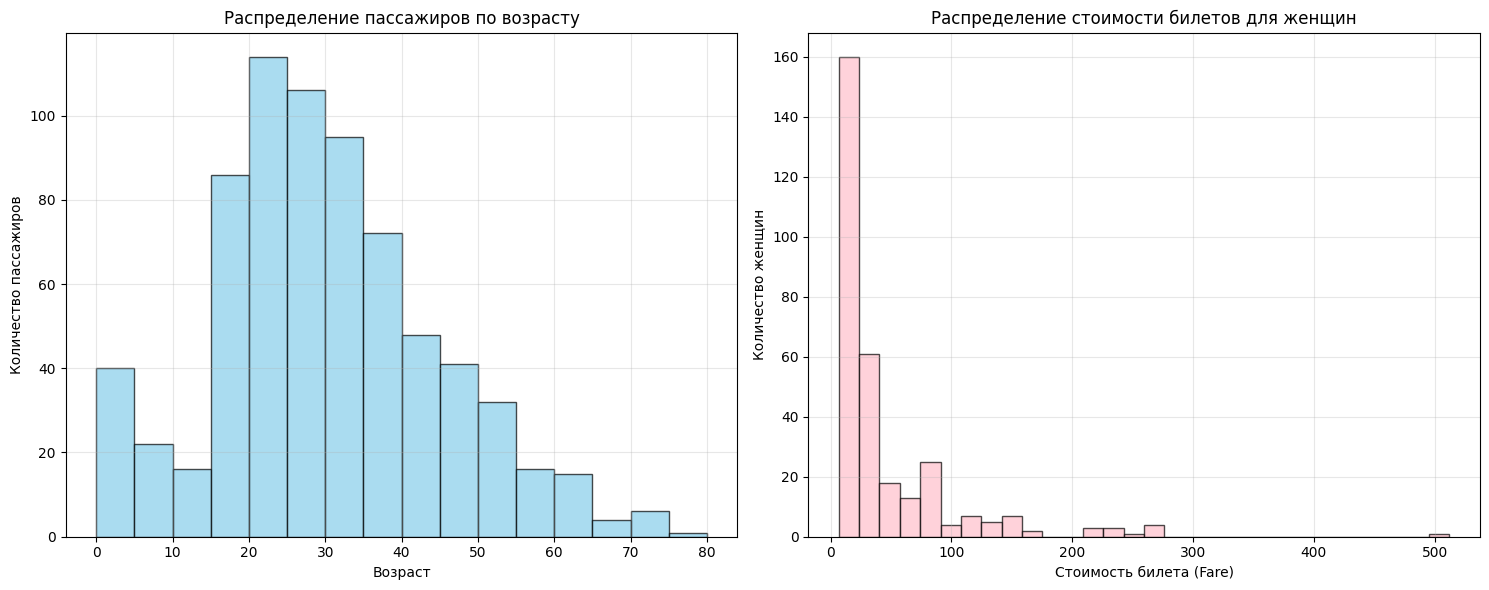

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных Titanic
titanic = pd.read_csv('https://raw.githubusercontent.com/Andrey-Miroshnikov/dap-2024/main/les04/data/titanic.csv')

titanic_age_clean = titanic.dropna(subset=['Age'])
titanic_fare_female = titanic[(titanic['Sex'] == 'female') & (titanic['Fare'].notna())]

# Создание графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма распределения по возрасту
ax1.hist(titanic_age_clean['Age'], bins=range(0, 85, 5), alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Распределение пассажиров по возрасту')
ax1.grid(True, alpha=0.3)

# Гистограмма распределения стоимости билетов для женщин
ax2.hist(titanic_fare_female['Fare'], bins=30, alpha=0.7, color='pink', edgecolor='black')
ax2.set_xlabel('Стоимость билета (Fare)')
ax2.set_ylabel('Количество женщин')
ax2.set_title('Распределение стоимости билетов для женщин')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Задача №5. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - средняя стоимость за проезд для данного класса (Fare)
* График должен иметь подписи к осям, легенду и заголовок

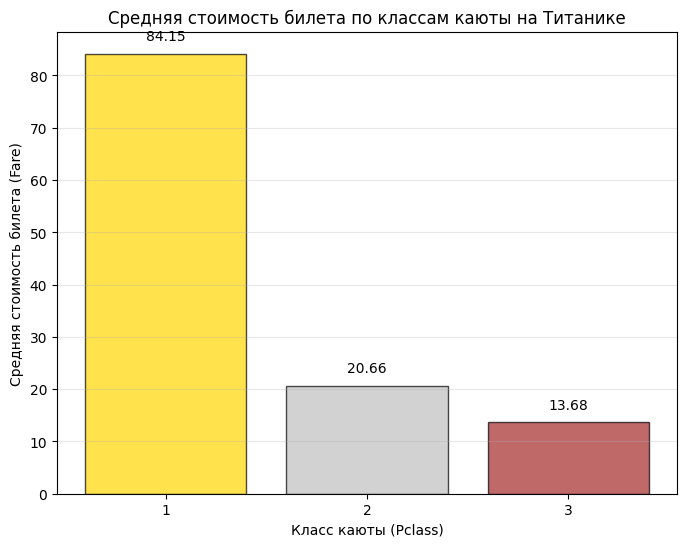

In [39]:
# Группировка по классу и вычисление средней стоимости
fare_by_class = titanic.groupby('Pclass')['Fare'].mean()

# Создание графика
plt.figure(figsize=(8, 6))
bars = plt.bar(fare_by_class.index, fare_by_class.values,
               color=['gold', 'silver', 'brown'], alpha=0.7, edgecolor='black')

# Добавление значений на столбцы
for bar, value in zip(bars, fare_by_class.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Средняя стоимость билета (Fare)')
plt.title('Средняя стоимость билета по классам каюты на Титанике')
plt.xticks([1, 2, 3])
plt.grid(True, alpha=0.3, axis='y')
plt.show()

Задача №6. Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* Диаграмма должна быть вертикальной
* По оси X - класс каюты пассажира (Pclass)
* По оси Y - количество пассажиров с разбивкой по полу (Sex)
* График должен иметь подписи к осям, легенду и заголовок

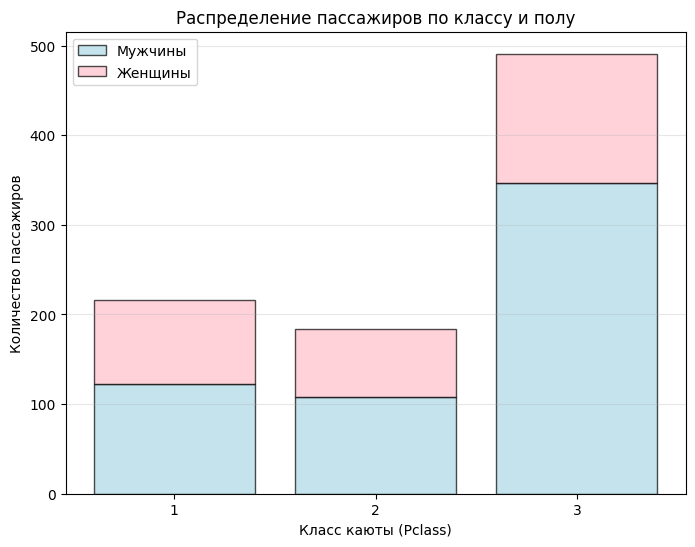

In [41]:
# Группировка по классу и полу
passengers_by_class_sex = titanic.groupby(['Pclass', 'Sex']).size().unstack()

# Создание графика
plt.figure(figsize=(8, 6))
bars = plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['male'],
               label='Мужчины', color='lightblue', alpha=0.7, edgecolor='black')
plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['female'],
        bottom=passengers_by_class_sex['male'], label='Женщины',
        color='pink', alpha=0.7, edgecolor='black')

plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение пассажиров по классу и полу')
plt.xticks([1, 2, 3])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

Задача №7. Для набора данных iris постройте круговую диаграмму

* Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе
* Сектор с максимальной долей долен быть выдвинут
* График должен иметь подписи к осям, легенду и заголовок

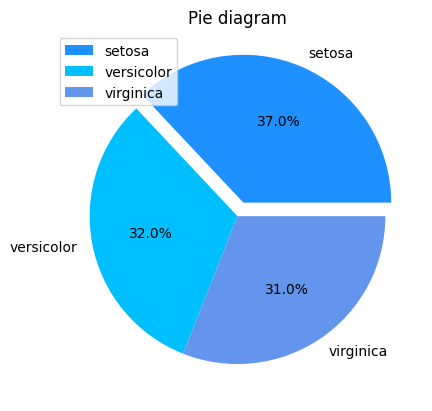

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
target_series = pd.Series(iris.target)
freq_table = target_series.sample(100, random_state = 42).value_counts()
plt.pie(
    freq_table,
    labels=[iris.target_names[i] for i in freq_table.index],
    colors=["dodgerblue", "deepskyblue", "cornflowerblue"],
    autopct="%.1f%%",
    explode=[0.1, 0, 0]
    )
plt.title("Pie diagram")
plt.legend()
plt.show()

Задача №8. Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров "Титаника"

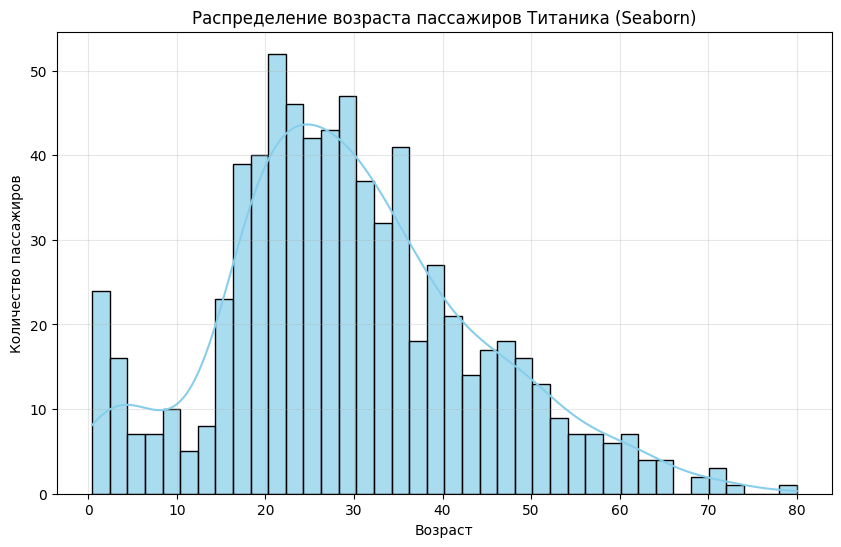

In [56]:

# Очистка данных от пропусков в возрасте
titanic_age_clean = titanic.dropna(subset=['Age'])

# Создание гистограммы с Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_age_clean, x='Age', bins=40, kde=True,
             color='skyblue', alpha=0.7, edgecolor='black')

plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров Титаника (Seaborn)')
plt.grid(True, alpha=0.3)
plt.show()

## Выводы

В ходе выполнения лабораторной работы №5 по визуализации данных были успешно освоены и применены на практике следующие ключевые аспекты:

### Основные достижения:
1. **Освоены различные типы графиков** - линейные, scatter-диаграммы, гистограммы, столбчатые диаграммы, круговые диаграммы и комбинированные визуализации
2. **Изучены возможности библиотек** Matplotlib и Seaborn для создания профессиональных визуализаций
3. **Реализована работа с реальными datasets** - Titanic и Iris, включая предобработку данных
4. **Освоены методы настройки графиков** - цветовые схемы, стили линий, маркеры, легенды, подписи осей

Полученные навыки визуализации данных являются фундаментальными для дальнейшего изучения анализа данных и машинного обучения, так как позволяют эффективно исследовать данные, формулировать гипотезы и представлять результаты анализа.

## Ответы на контрольные вопросы

1. **Для чего используется диаграмма рассеяния?**  
   Диаграмма рассеяния используется для визуализации взаимосвязи между двумя количественными переменными, выявления закономерностей, корреляций, выбросов и кластеров в данных.

2. **Что такое гистограмма, чем он отличается от столбчатой диаграммы?**  
   Гистограмма показывает распределение непрерывных данных по интервалам (бинам), где площадь столбца пропорциональна частоте попадания значений в интервал. Столбчатая диаграмма сравнивает дискретные категории, где высота столбца пропорциональна значению категории.

3. **Как задать цвет линии в линейном графике Matplotlib?**  
   Цвет линии можно задать с помощью параметра `color` (например, `color='red'` или `color='#FF0000'`), либо с помощью сокращенного обозначения (например, `'r'` для красного).

4. **Чем класс plt.Figure отличается от объекта plt.Axes?**  
   `plt.Figure` представляет весь холст (окно), на котором размещаются графики. `plt.Axes` представляет отдельную систему координат (подграфик) на этом холсте, содержащую оси, линии, маркеры и другие элементы графика.

5. **Matplotlib не позволяет управлять типом маркера scatter графика. Да или нет?**  
   **Нет**. Matplotlib позволяет управлять типом маркера через параметр `marker` (например, `marker='o'` для круга, `marker='x'` для креста).

6. **Matplotlib единственная библиотека для построения графиков в Python. Да или нет?**  
   **Нет**. Существуют и другие библиотеки для визуализации данных, такие как Seaborn, Plotly, Bokeh, Altair, ggplot и многие другие.

7. **Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?**  
   **Нет**. Matplotlib предоставляет метод `savefig()` для сохранения графиков в различные форматы файлов (PNG, JPG, PDF, SVG и др.).

8. **В наборе данных iris представлены 4 вида ирисов. Да или нет?**  
   **Нет**. В классическом наборе данных iris представлены 3 вида ирисов: setosa, versicolor и virginica.

9. **Для всех пассажиров "Титаника" указан возраст. Да или нет?**  
   **Нет**. В наборе данных Titanic присутствуют пропущенные значения (NaN) в столбце Age.

10. **На одном холсте может располагаться не более 16 диаграмм, это обусловлено тем что размер диаграммы нельзя изменить и более мелкие графики попросту не будут видны.**  
    **Нет**. На одном холсте можно расположить любое количество диаграмм, создавая сетку нужного размера с помощью `plt.subplots()`. Однако практическое ограничение накладывается читаемостью и удобством восприятия графиков.